In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
diabetes = pd.read_csv('diabetes_dataset.csv')

In [ ]:
diabetes.head(20)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
5,2016,Male,66.0,Alabama,0,0,1,0,0,0,0,not current,27.32,5.7,159,0
6,2015,Female,49.0,Alabama,0,0,1,0,0,0,0,current,24.34,5.7,80,0
7,2016,Female,15.0,Alabama,0,0,0,0,1,0,0,No Info,20.98,5.0,155,0
8,2016,Male,51.0,Alabama,1,0,0,0,0,0,0,never,38.14,6.0,100,0
9,2015,Male,42.0,Alabama,0,0,1,0,0,0,0,No Info,27.32,5.7,160,0


### Exploring data


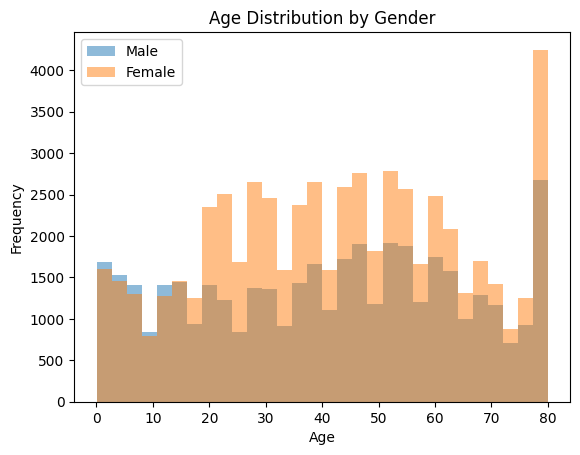

In [ ]:
import matplotlib.pyplot as plt

plt.hist(diabetes[diabetes['gender'] == 'Male']['age'], bins=30, alpha=0.5, label='Male')
plt.hist(diabetes[diabetes['gender'] == 'Female']['age'], bins=30, alpha=0.5, label='Female')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

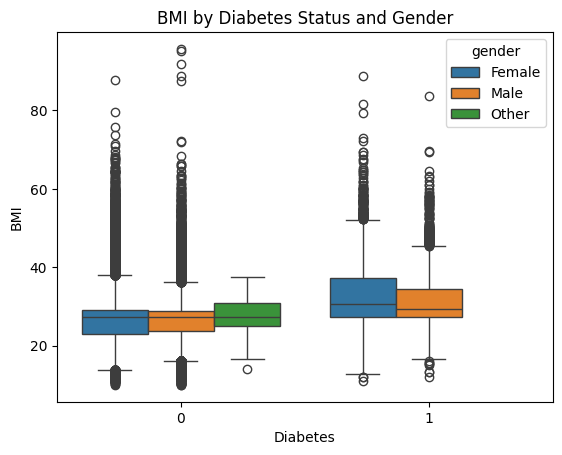

In [ ]:
import seaborn as sns

sns.boxplot(x='diabetes', y='bmi', hue='gender', data=diabetes)
plt.title('BMI by Diabetes Status and Gender')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.show()


In [ ]:
diabetes['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


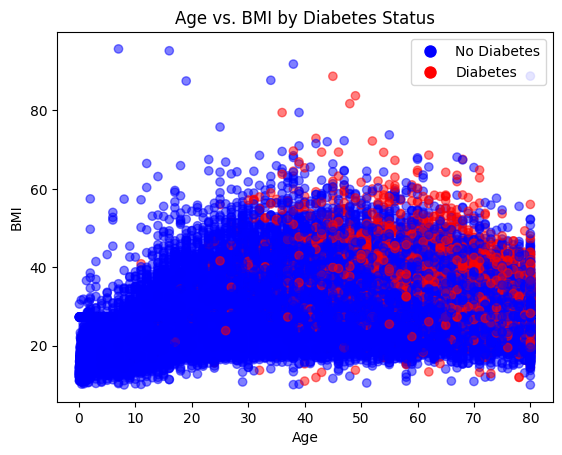

In [ ]:
# Scatter plot of Age vs. BMI, color-coded by diabetes status
colors = {0: 'blue', 1: 'red'}
plt.scatter(diabetes['age'], diabetes['bmi'], c=diabetes['diabetes'].apply(lambda x: colors[x]), alpha=0.5)
plt.title('Age vs. BMI by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Diabetes'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diabetes')])
plt.show()

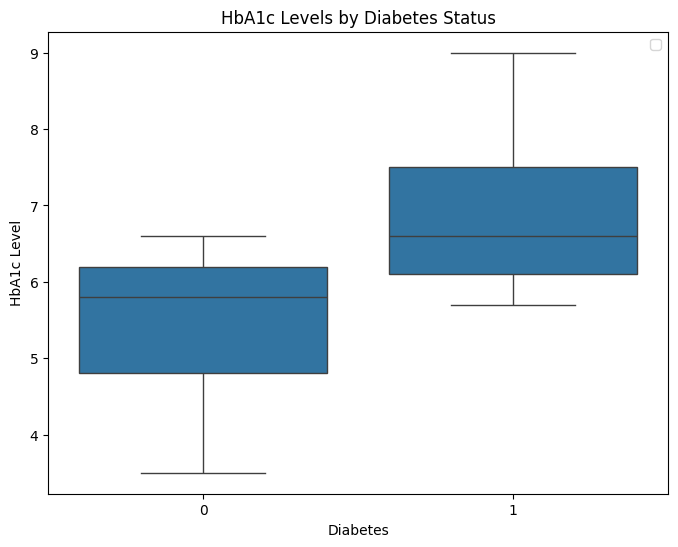

In [ ]:
# Create a box plot of HbA1c levels by diabetes status
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='hbA1c_level', data=diabetes)
plt.title('HbA1c Levels by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')

plt.show()

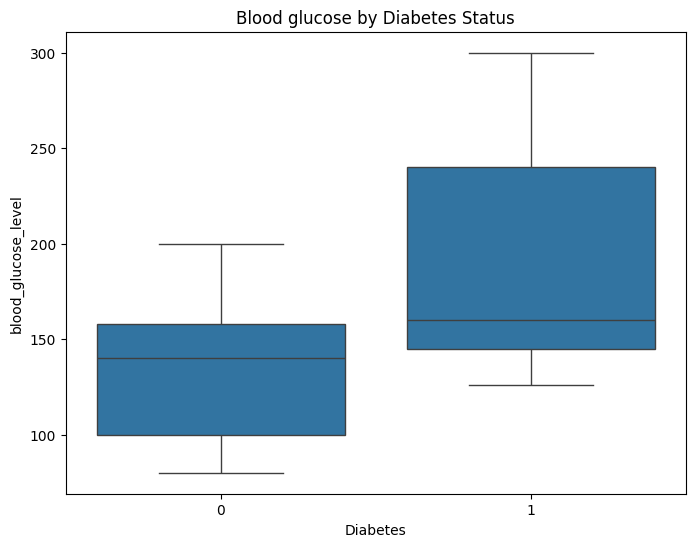

In [ ]:
# Create a box plot of HbA1c levels by diabetes status
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=diabetes)
plt.title('Blood glucose by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('blood_glucose_level')
plt.show()


### Identiying and cleaning values

In [ ]:
# Clean the 'smoking_history' column by replacing 'ever' with 'never'
diabetes['smoking_history'] = diabetes['smoking_history'].replace('ever', 'never')


diabetes['smoking_history'].value_counts()

smoking_history
never          39099
No Info        35816
former          9352
current         9286
not current     6447
Name: count, dtype: int64

In [ ]:
rule = {
    'smoking_history': diabetes['smoking_history'] == 'No Info'  }


In [ ]:
rule2={
    'age': diabetes['age'] <= 0
}

In [ ]:

#using the rules to replace the values with Nan
for column, rule in  rule.items():
  diabetes.loc[rule, column]= np.nan

In [ ]:
#using the rules to replace the values with Nan
for column, rule2 in  rule2.items():
  diabetes.loc[rule, column]= np.nan

In [ ]:
diabetes.head(20)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
5,2016,Male,66.0,Alabama,0,0,1,0,0,0,0,not current,27.32,5.7,159,0
6,2015,Female,49.0,Alabama,0,0,1,0,0,0,0,current,24.34,5.7,80,0
7,2016,Female,NaN,Alabama,0,0,0,0,1,0,0,NaN,20.98,5.0,155,0
8,2016,Male,51.0,Alabama,1,0,0,0,0,0,0,never,38.14,6.0,100,0
9,2015,Male,NaN,Alabama,0,0,1,0,0,0,0,NaN,27.32,5.7,160,0


In [ ]:
diabetes['smoking_history'].value_counts()

smoking_history
never          39099
former          9352
current         9286
not current     6447
Name: count, dtype: int64

In [ ]:
HealthNan = diabetes.copy()
Health_Null_Count = HealthNan.isnull().any(axis=1).sum()

# Calculate the proportion of rows with missing values
nullprop = Health_Null_Count / len(diabetes)

# Output the proportion
print(nullprop)

0.35816


In [ ]:
null= diabetes.isnull().sum()
null

year                        0
gender                      0
age                     35816
location                    0
race:AfricanAmerican        0
race:Asian                  0
race:Caucasian              0
race:Hispanic               0
race:Other                  0
hypertension                0
heart_disease               0
smoking_history         35816
bmi                         0
hbA1c_level                 0
blood_glucose_level         0
diabetes                    0
dtype: int64

In [ ]:
diabetes.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,64184.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,46.544112,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,19.540334,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.160000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,31.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,47.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,61.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Categgorical data to boolean numeric value

In [ ]:
df2= diabetes.copy()

In [ ]:
# One-hot encode the gender column
df_encoded = pd.get_dummies(df2, columns=['gender'], drop_first=False)

In [ ]:
for col in df_encoded.columns:
    try:
        df_encoded[col] = df_encoded[col].astype(int)
    except ValueError as e:
        print(f"Error converting column '{col}': {e}")
        print(f"Unique values in '{col}': {df_encoded[col].unique()}")


Error converting column 'age': Cannot convert non-finite values (NA or inf) to integer
Unique values in 'age': [32.   29.   18.   41.   52.   66.   49.     nan 51.   53.   40.   64.
 23.    2.   12.   50.   75.   42.   72.   46.   14.   24.   55.   80.
 31.   38.   79.    3.    8.   11.   25.   28.    4.   54.   43.   69.
 48.   59.   19.   45.   44.   73.   71.   22.   39.   68.    6.   65.
 26.   30.   58.   47.   62.   77.   56.   37.   20.   21.   67.   36.
 60.   17.   35.    5.   57.   15.   27.   70.   63.   74.   33.   34.
 61.   76.   78.   16.    9.   10.    7.   13.    1.16  0.48  1.64  1.4
  1.88  0.8   1.24  0.56  1.08  1.8   1.48  0.88  1.56  0.72  0.24  1.72
  0.32  0.4   1.32  0.16  1.    0.64]
Error converting column 'location': invalid literal for int() with base 10: 'Alabama'
Unique values in 'location': ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illin

In [ ]:
df_encoded.head(20)

,year,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,2020,32.0,Alabama,0,0,0,0,1,0,0,never,27,5,100,0,1,0,0
1,2015,29.0,Alabama,0,1,0,0,0,0,0,never,19,5,90,0,1,0,0
2,2015,18.0,Alabama,0,0,0,0,1,0,0,never,23,4,160,0,0,1,0
3,2015,41.0,Alabama,0,0,1,0,0,0,0,never,27,4,159,0,0,1,0
4,2016,52.0,Alabama,1,0,0,0,0,0,0,never,23,6,90,0,1,0,0
5,2016,66.0,Alabama,0,0,1,0,0,0,0,not current,27,5,159,0,0,1,0
6,2015,49.0,Alabama,0,0,1,0,0,0,0,current,24,5,80,0,1,0,0
7,2016,NaN,Alabama,0,0,0,0,1,0,0,NaN,20,5,155,0,1,0,0
8,2016,51.0,Alabama,1,0,0,0,0,0,0,never,38,6,100,0,0,1,0
9,2015,NaN,Alabama,0,0,1,0,0,0,0,NaN,27,5,160,0,0,1,0


In [ ]:
df = diabetes.drop(columns=['gender'])

In [ ]:
# Concatenate the original dataframe with the one-hot encoded gender columns
df_final = pd.concat([df, df_encoded], axis=1)

# Display the updated dataframe
df_final.head()

,year,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,...,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,2020,32.0,Alabama,0,0,0,0,1,0,0,...,0,0,never,27,5,100,0,1,0,0
1,2015,29.0,Alabama,0,1,0,0,0,0,0,...,0,0,never,19,5,90,0,1,0,0
2,2015,18.0,Alabama,0,0,0,0,1,0,0,...,0,0,never,23,4,160,0,0,1,0
3,2015,41.0,Alabama,0,0,1,0,0,0,0,...,0,0,never,27,4,159,0,0,1,0
4,2016,52.0,Alabama,1,0,0,0,0,0,0,...,0,0,never,23,6,90,0,1,0,0


In [ ]:
# One-hot encode the gender column
df_encoded1 = pd.get_dummies(df2, columns=['smoking_history'], drop_first=False)

In [ ]:
for col in df_encoded1.columns:
    try:
        df_encoded1[col] = df_encoded1[col].astype(int)
    except ValueError as e:
        print(f"Error converting column '{col}': {e}")
        print(f"Unique values in '{col}': {df_encoded1[col].unique()}")

Error converting column 'gender': invalid literal for int() with base 10: 'Female'
Unique values in 'gender': ['Female' 'Male' 'Other']
Error converting column 'age': Cannot convert non-finite values (NA or inf) to integer
Unique values in 'age': [32.   29.   18.   41.   52.   66.   49.     nan 51.   53.   40.   64.
 23.    2.   12.   50.   75.   42.   72.   46.   14.   24.   55.   80.
 31.   38.   79.    3.    8.   11.   25.   28.    4.   54.   43.   69.
 48.   59.   19.   45.   44.   73.   71.   22.   39.   68.    6.   65.
 26.   30.   58.   47.   62.   77.   56.   37.   20.   21.   67.   36.
 60.   17.   35.    5.   57.   15.   27.   70.   63.   74.   33.   34.
 61.   76.   78.   16.    9.   10.    7.   13.    1.16  0.48  1.64  1.4
  1.88  0.8   1.24  0.56  1.08  1.8   1.48  0.88  1.56  0.72  0.24  1.72
  0.32  0.4   1.32  0.16  1.    0.64]
Error converting column 'location': invalid literal for int() with base 10: 'Alabama'
Unique values in 'location': ['Alabama' 'Alaska' 'Arizona'

In [ ]:
df_encoded.head(20)

,year,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,2020,32.0,Alabama,0,0,0,0,1,0,0,never,27,5,100,0,1,0,0
1,2015,29.0,Alabama,0,1,0,0,0,0,0,never,19,5,90,0,1,0,0
2,2015,18.0,Alabama,0,0,0,0,1,0,0,never,23,4,160,0,0,1,0
3,2015,41.0,Alabama,0,0,1,0,0,0,0,never,27,4,159,0,0,1,0
4,2016,52.0,Alabama,1,0,0,0,0,0,0,never,23,6,90,0,1,0,0
5,2016,66.0,Alabama,0,0,1,0,0,0,0,not current,27,5,159,0,0,1,0
6,2015,49.0,Alabama,0,0,1,0,0,0,0,current,24,5,80,0,1,0,0
7,2016,NaN,Alabama,0,0,0,0,1,0,0,NaN,20,5,155,0,1,0,0
8,2016,51.0,Alabama,1,0,0,0,0,0,0,never,38,6,100,0,0,1,0
9,2015,NaN,Alabama,0,0,1,0,0,0,0,NaN,27,5,160,0,0,1,0


In [ ]:
# Calculate the correlation matrix for the 'diabetes' variable with other specific variables.
df_encoded[['diabetes', 'age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'hypertension']].corr()


,diabetes,age,bmi,hbA1c_level,blood_glucose_level,hypertension
diabetes,1.000000,0.260870,0.213544,0.387336,0.419558,0.197823
age,0.260870,1.000000,0.161343,0.112177,0.116955,0.252230
bmi,0.213544,0.161343,1.000000,0.079876,0.090865,0.147073
hbA1c_level,0.387336,0.112177,0.079876,1.000000,0.161099,0.076847
blood_glucose_level,0.419558,0.116955,0.090865,0.161099,1.000000,0.084429
hypertension,0.197823,0.252230,0.147073,0.076847,0.084429,1.000000


In [ ]:
# One-hot encode the 'smoking_history' column
df_encoded = pd.get_dummies(df2, columns=['smoking_history'], prefix='smoking')

# Convert the one-hot encoded columns to boolean (1 and 0)
for col in df_encoded.columns:
  if 'smoking_' in col:
    df_encoded[col] = df_encoded[col].astype(int)

# Display the updated dataframe
df_encoded.head(20)


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,smoking_current,smoking_former,smoking_never,smoking_not current
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,27.32,5.0,100,0,0,0,1,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,19.95,5.0,90,0,0,0,1,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,23.76,4.8,160,0,0,0,1,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,27.32,4.0,159,0,0,0,1,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,23.75,6.5,90,0,0,0,1,0
5,2016,Male,66.0,Alabama,0,0,1,0,0,0,0,27.32,5.7,159,0,0,0,0,1
6,2015,Female,49.0,Alabama,0,0,1,0,0,0,0,24.34,5.7,80,0,1,0,0,0
7,2016,Female,NaN,Alabama,0,0,0,0,1,0,0,20.98,5.0,155,0,0,0,0,0
8,2016,Male,51.0,Alabama,1,0,0,0,0,0,0,38.14,6.0,100,0,0,0,1,0
9,2015,Male,NaN,Alabama,0,0,1,0,0,0,0,27.32,5.7,160,0,0,0,0,0


In [ ]:
df_encoded.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'bmi', 'hbA1c_level',
       'blood_glucose_level', 'diabetes', 'smoking_current', 'smoking_former',
       'smoking_never', 'smoking_not current'],
      dtype='object')

In [ ]:
# Create new columns 'gender_Male' and 'gender_Female'
df_encoded['gender_Male'] = (df_encoded['gender'] == 'Male').astype(int)
df_encoded['gender_Female'] = (df_encoded['gender'] == 'Female').astype(int)
df_encoded['gender_Other'] = (df_encoded['gender'] == 'Other').astype(int)

# Drop the original 'gender' column
df_encoded.drop('gender', axis=1, inplace=True)

# Display the updated dataframe
df_encoded.head(20)


,year,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,...,hbA1c_level,blood_glucose_level,diabetes,smoking_current,smoking_former,smoking_never,smoking_not current,gender_Male,gender_Female,gender_Other
0,2020,32.0,Alabama,0,0,0,0,1,0,0,...,5.0,100,0,0,0,1,0,0,1,0
1,2015,29.0,Alabama,0,1,0,0,0,0,0,...,5.0,90,0,0,0,1,0,0,1,0
2,2015,18.0,Alabama,0,0,0,0,1,0,0,...,4.8,160,0,0,0,1,0,1,0,0
3,2015,41.0,Alabama,0,0,1,0,0,0,0,...,4.0,159,0,0,0,1,0,1,0,0
4,2016,52.0,Alabama,1,0,0,0,0,0,0,...,6.5,90,0,0,0,1,0,0,1,0
5,2016,66.0,Alabama,0,0,1,0,0,0,0,...,5.7,159,0,0,0,0,1,1,0,0
6,2015,49.0,Alabama,0,0,1,0,0,0,0,...,5.7,80,0,1,0,0,0,0,1,0
7,2016,NaN,Alabama,0,0,0,0,1,0,0,...,5.0,155,0,0,0,0,0,0,1,0
8,2016,51.0,Alabama,1,0,0,0,0,0,0,...,6.0,100,0,0,0,1,0,1,0,0
9,2015,NaN,Alabama,0,0,1,0,0,0,0,...,5.7,160,0,0,0,0,0,1,0,0


In [ ]:
df_encoded.columns

Index(['year', 'age', 'location', 'race:AfricanAmerican', 'race:Asian',
       'race:Caucasian', 'race:Hispanic', 'race:Other', 'hypertension',
       'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level',
       'diabetes', 'smoking_current', 'smoking_former', 'smoking_never',
       'smoking_not current', 'gender_Male', 'gender_Female', 'gender_Other'],
      dtype='object')

In [ ]:
# Identify duplicate columns
duplicate_columns = df_encoded.columns[df_encoded.columns.duplicated()]

# Drop duplicate columns
df_encoded = df_encoded.loc[:,~df_encoded.columns.duplicated()]

df_encoded.head(20)


,year,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,...,hbA1c_level,blood_glucose_level,diabetes,smoking_current,smoking_former,smoking_never,smoking_not current,gender_Male,gender_Female,gender_Other
0,2020,32.0,Alabama,0,0,0,0,1,0,0,...,5.0,100,0,0,0,1,0,0,1,0
1,2015,29.0,Alabama,0,1,0,0,0,0,0,...,5.0,90,0,0,0,1,0,0,1,0
2,2015,18.0,Alabama,0,0,0,0,1,0,0,...,4.8,160,0,0,0,1,0,1,0,0
3,2015,41.0,Alabama,0,0,1,0,0,0,0,...,4.0,159,0,0,0,1,0,1,0,0
4,2016,52.0,Alabama,1,0,0,0,0,0,0,...,6.5,90,0,0,0,1,0,0,1,0
5,2016,66.0,Alabama,0,0,1,0,0,0,0,...,5.7,159,0,0,0,0,1,1,0,0
6,2015,49.0,Alabama,0,0,1,0,0,0,0,...,5.7,80,0,1,0,0,0,0,1,0
7,2016,NaN,Alabama,0,0,0,0,1,0,0,...,5.0,155,0,0,0,0,0,0,1,0
8,2016,51.0,Alabama,1,0,0,0,0,0,0,...,6.0,100,0,0,0,1,0,1,0,0
9,2015,NaN,Alabama,0,0,1,0,0,0,0,...,5.7,160,0,0,0,0,0,1,0,0


### imputing missing values

In [ ]:
# Calculate the correlation matrix for the 'diabetes' variable with other specific variables.
df_encoded[['diabetes', 'age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'hypertension', 'smoking_current', 'smoking_former', 'smoking_never', 'smoking_not current', 'gender_Male','gender_Female','gender_Other']].corr()


,diabetes,age,bmi,hbA1c_level,blood_glucose_level,hypertension,smoking_current,smoking_former,smoking_never,smoking_not current,gender_Male,gender_Female,gender_Other
diabetes,1.000000,0.260870,0.214357,0.400660,0.419558,0.197823,0.019606,0.097917,0.036343,0.020734,0.037666,-0.037553,-0.004090
age,0.260870,1.000000,0.161294,0.115990,0.116955,0.252230,-0.052207,0.222291,-0.135161,0.019589,0.022341,-0.022008,-0.011811
bmi,0.214357,0.161294,1.000000,0.082997,0.091261,0.147666,0.053617,0.111312,0.102759,0.034979,-0.023021,0.023016,0.000119
hbA1c_level,0.400660,0.115990,0.082997,1.000000,0.166733,0.080939,0.006123,0.037306,0.014329,0.009830,0.020058,-0.020015,-0.001528
blood_glucose_level,0.419558,0.116955,0.091261,0.166733,1.000000,0.084429,0.012447,0.040688,0.014719,0.008613,0.017189,-0.017200,0.000457
hypertension,0.197823,0.252230,0.147666,0.080939,0.084429,1.000000,0.017930,0.083401,0.054236,0.000997,0.014423,-0.014318,-0.003816
smoking_current,0.019606,-0.052207,0.053617,0.006123,0.012447,0.017930,1.000000,-0.102766,-0.256359,-0.083990,0.026636,-0.026517,-0.004293
smoking_former,0.097917,0.222291,0.111312,0.037306,0.040688,0.083401,-0.102766,1.000000,-0.257362,-0.084319,0.049048,-0.048927,-0.004310
smoking_never,0.036343,-0.135161,0.102759,0.014329,0.014719,0.054236,-0.256359,-0.257362,1.000000,-0.210339,-0.091969,0.092090,-0.004641
smoking_not current,0.020734,0.019589,0.034979,0.009830,0.008613,0.000997,-0.083990,-0.084319,-0.210339,1.000000,-0.011985,0.011419,0.020760


In [ ]:
df_encoded.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,smoking_current,smoking_former,smoking_never,smoking_not current,gender_Male,gender_Female,gender_Other
count,100000.000000,64184.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,2018.360820,46.544112,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000,0.092860,0.093520,0.390990,0.06447,0.414300,0.585520,0.000180
std,1.345239,19.540334,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883,0.290238,0.291161,0.487975,0.24559,0.492603,0.492635,0.013415
min,2015.000000,0.160000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2019.000000,31.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2019.000000,47.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,2019.000000,61.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
from scipy import stats
from statsmodels.formula.api import ols #or glm for logistic

In [ ]:
df3 = df_encoded.copy()

In [ ]:
df3['age'].isnull().sum()

35816

In [ ]:
df_encoded.shape

(100000, 21)

In [ ]:
df_encoded['age'].mean()

46.544111928206405

In [ ]:
df_encoded['age'].median()

47.0

In [ ]:
df_encoded['AgeImpMedian']=df_encoded['age'].fillna(df_encoded['age'].median())
df_encoded['AgeImpMedian'].head(15)

0     32.0
1     29.0
2     18.0
3     41.0
4     52.0
5     66.0
6     49.0
7     47.0
8     51.0
9     47.0
10    47.0
11    53.0
12    47.0
13    40.0
14    64.0
Name: AgeImpMedian, dtype: float64

In [ ]:
df_encoded.head(20)

,year,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,...,blood_glucose_level,diabetes,smoking_current,smoking_former,smoking_never,smoking_not current,gender_Male,gender_Female,gender_Other,AgeImpMedian
0,2020,32.0,Alabama,0,0,0,0,1,0,0,...,100,0,0,0,1,0,0,1,0,32.0
1,2015,29.0,Alabama,0,1,0,0,0,0,0,...,90,0,0,0,1,0,0,1,0,29.0
2,2015,18.0,Alabama,0,0,0,0,1,0,0,...,160,0,0,0,1,0,1,0,0,18.0
3,2015,41.0,Alabama,0,0,1,0,0,0,0,...,159,0,0,0,1,0,1,0,0,41.0
4,2016,52.0,Alabama,1,0,0,0,0,0,0,...,90,0,0,0,1,0,0,1,0,52.0
5,2016,66.0,Alabama,0,0,1,0,0,0,0,...,159,0,0,0,0,1,1,0,0,66.0
6,2015,49.0,Alabama,0,0,1,0,0,0,0,...,80,0,1,0,0,0,0,1,0,49.0
7,2016,NaN,Alabama,0,0,0,0,1,0,0,...,155,0,0,0,0,0,0,1,0,47.0
8,2016,51.0,Alabama,1,0,0,0,0,0,0,...,100,0,0,0,1,0,1,0,0,51.0
9,2015,NaN,Alabama,0,0,1,0,0,0,0,...,160,0,0,0,0,0,1,0,0,47.0


In [ ]:
df_encoded = df_encoded.drop('age', axis=1)

In [ ]:
df_encoded.head(20)

,year,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,...,blood_glucose_level,diabetes,smoking_current,smoking_former,smoking_never,smoking_not current,gender_Male,gender_Female,gender_Other,AgeImpMedian
0,2020,Alabama,0,0,0,0,1,0,0,27.32,...,100,0,0,0,1,0,0,1,0,32.0
1,2015,Alabama,0,1,0,0,0,0,0,19.95,...,90,0,0,0,1,0,0,1,0,29.0
2,2015,Alabama,0,0,0,0,1,0,0,23.76,...,160,0,0,0,1,0,1,0,0,18.0
3,2015,Alabama,0,0,1,0,0,0,0,27.32,...,159,0,0,0,1,0,1,0,0,41.0
4,2016,Alabama,1,0,0,0,0,0,0,23.75,...,90,0,0,0,1,0,0,1,0,52.0
5,2016,Alabama,0,0,1,0,0,0,0,27.32,...,159,0,0,0,0,1,1,0,0,66.0
6,2015,Alabama,0,0,1,0,0,0,0,24.34,...,80,0,1,0,0,0,0,1,0,49.0
7,2016,Alabama,0,0,0,0,1,0,0,20.98,...,155,0,0,0,0,0,0,1,0,47.0
8,2016,Alabama,1,0,0,0,0,0,0,38.14,...,100,0,0,0,1,0,1,0,0,51.0
9,2015,Alabama,0,0,1,0,0,0,0,27.32,...,160,0,0,0,0,0,1,0,0,47.0


In [ ]:
# prompt: Download the current dataset

from google.colab import files
df_encoded.to_csv('diabetes_dataset_cleaned.csv', index=False)
files.download('diabetes_dataset_cleaned.csv')


### finalized raphics

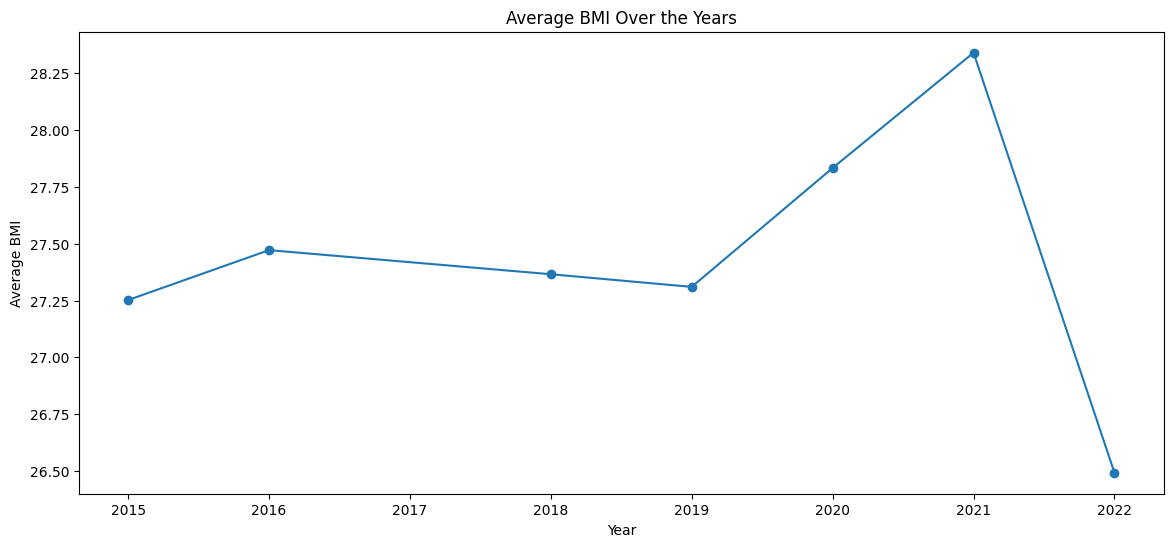

In [ ]:
# Calculating yearly averages for BMI and blood glucose levels
yearly_averages = df_encoded.groupby('year')[['bmi', 'blood_glucose_level', 'hbA1c_level']].mean()

# Creating line plots for BMI and blood glucose levels over the years
plt.figure(figsize=(14, 6))

plt.plot(yearly_averages.index, yearly_averages['bmi'], marker='o', linestyle='-')
plt.title('Average BMI Over the Years')
plt.xlabel('Year')
plt.ylabel('Average BMI')

plt.show()

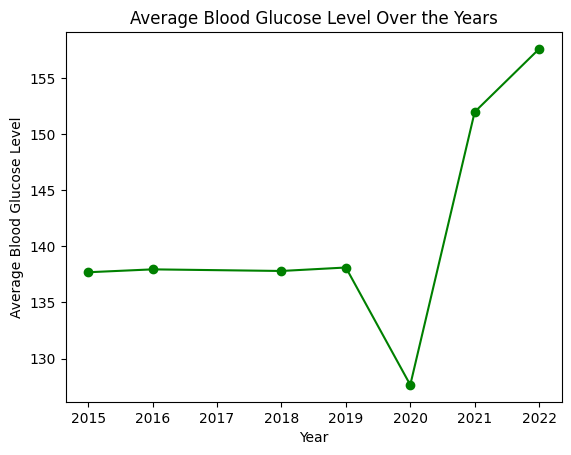

In [ ]:

plt.plot(yearly_averages.index, yearly_averages['blood_glucose_level'], marker='o', linestyle='-', color='green')
plt.title('Average Blood Glucose Level Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Blood Glucose Level')

plt.show()


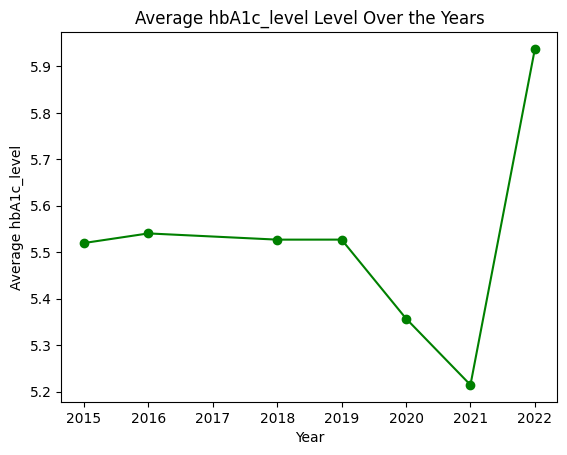

In [ ]:

plt.plot(yearly_averages.index, yearly_averages['hbA1c_level'], marker='o', linestyle='-', color='green')
plt.title('Average hbA1c_level Level Over the Years')
plt.xlabel('Year')
plt.ylabel('Average hbA1c_level')

plt.show()


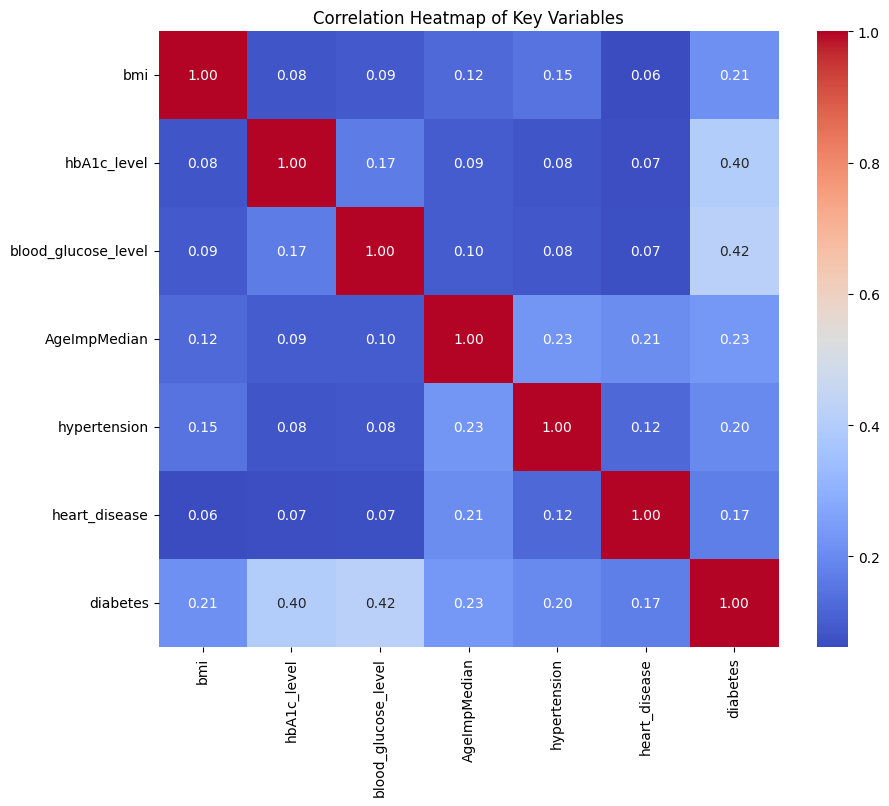

In [ ]:

# Calculate the correlation matrix for the relevant numerical columns
correlation_matrix = df_encoded[['bmi', 'hbA1c_level', 'blood_glucose_level', 'AgeImpMedian', 'hypertension', 'heart_disease', 'diabetes']].corr()

# Creating the correlation heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

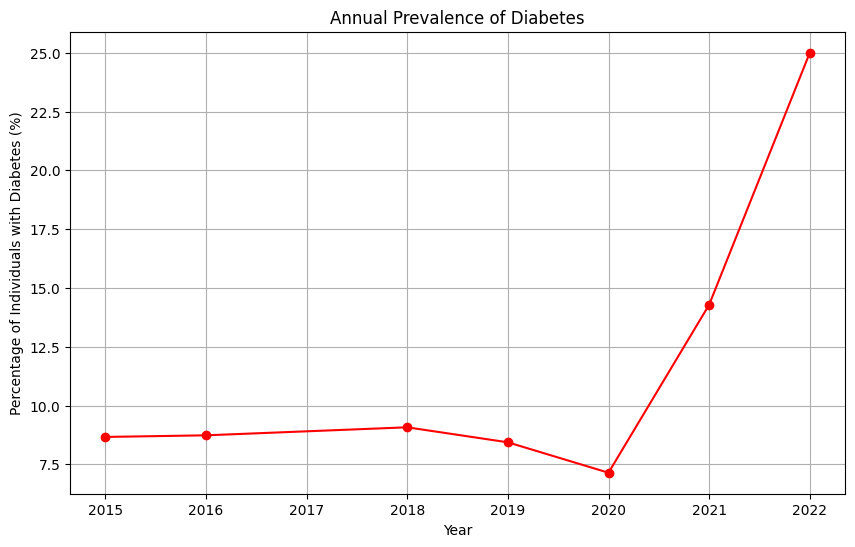

In [ ]:
# Calculating the annual prevalence of diabetes
annual_diabetes_prevalence = df_encoded.groupby('year')['diabetes'].mean() * 100  # Convert to percentage

# Plotting the time series analysis of diabetes prevalence
plt.figure(figsize=(10, 6))
annual_diabetes_prevalence.plot(kind='line', marker='o', linestyle='-', color='red')
plt.title('Annual Prevalence of Diabetes')
plt.xlabel('Year')
plt.ylabel('Percentage of Individuals with Diabetes (%)')
plt.grid(True)
plt.show()


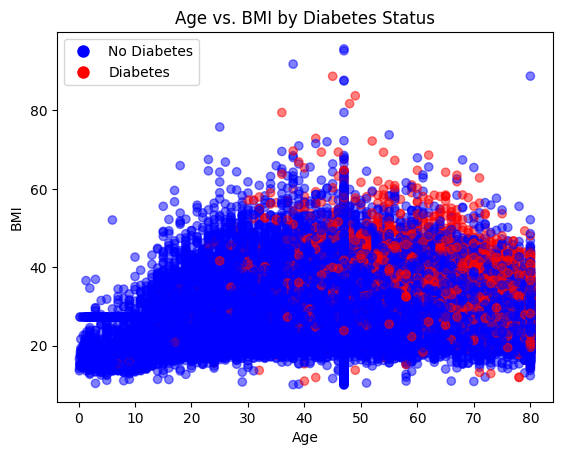

In [ ]:
colors = {0: 'blue', 1: 'red'}
plt.scatter(df_encoded['AgeImpMedian'], df_encoded['bmi'], c=df_encoded['diabetes'].apply(lambda x: colors[x]), alpha=0.5)
plt.title('Age vs. BMI by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Diabetes'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diabetes')])
plt.show()

In [ ]:
diabetes_count = df_encoded['diabetes'].sum()
print(f'Number of people with diabetes: {diabetes_count}')


Number of people with diabetes: 8500


In [ ]:
no_diabetes_count = len(df_encoded) - df_encoded['diabetes'].sum()
print(f'Number of people without diabetes: {no_diabetes_count}')


Number of people without diabetes: 91500
